# Machine Learning and Time Series Forecasting

## Import Fundamental Libraries

In [146]:
#import fundamental libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Engineer the necessary time features

In [147]:
ecom_df = pd.read_csv('../Data/Brazilian E-Commerce Public Dataset by Olist/ecom.csv')

ecom_df['Year'] = ecom_df['Year'].astype(str)
ecom_df['Month'] = ecom_df['Month'].astype(str)

#Change the column name
ecom_df = ecom_df.rename(columns={'product_category_name_english':'Product'})

ecom_df['order_purchase_date'] = pd.to_datetime(ecom_df['order_purchase_date'])
ecom_df['Week_Number'] = ecom_df['order_purchase_date'].dt.week

# 'Month_Year' (in timed order)
# ecom_df['Month_Year'] = pd.to_datetime(ecom_df['Month_Year'], format='%b-%Y')

# Extract the week and year into new columns
ecom_df["Week_Year"] = ecom_df["order_purchase_date"].dt.strftime('%G-%V')

# Convert the 'Week_Year' column to datetime format
ecom_df['week_starting_date'] = pd.to_datetime(ecom_df['Week_Year'] + '-1', format='%Y-%W-%w')
# Extract the date part (yyyy-mm-dd) from the datetime
ecom_df['week_starting_date'] = ecom_df['week_starting_date'].dt.strftime('%Y-%m-%d')


ecom_df['Revenue'] = ecom_df['Product_Order_Value']+ecom_df['freight_value']
ecom_df

C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_9096\1618130365.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  ecom_df['Week_Number'] = ecom_df['order_purchase_date'].dt.week


,ID,neg,neu,pos,compound,order_purchase_date,Product,review_comment_message,payment_type,customer_state,...,product_description_lenght,product_photos_qty,Month_Year,Year,Month,Product_Order_Value,Week_Number,Week_Year,week_starting_date,Revenue
0,1,0.000,0.738,0.262,0.5994,2017-01-05,auto,"I loved the product, matches the images, the d...",boleto,PR,...,1367.0,1.0,Jan-2017,2017,1,10.9,1,2017-01,2017-01-02,19.62
1,2,0.000,0.374,0.626,0.9544,2017-01-05,auto,"Very good seller, arrived well before the dead...",boleto,PR,...,1367.0,1.0,Jan-2017,2017,1,10.9,1,2017-01,2017-01-02,19.62
2,3,0.000,0.631,0.369,0.6249,2017-01-05,baby,"Fast delivery, product with quality and great ...",boleto,PR,...,1183.0,1.0,Jan-2017,2017,1,9.9,1,2017-01,2017-01-02,18.62
3,4,0.000,0.556,0.444,0.8402,2017-01-05,baby,The product was of great quality and the deliv...,boleto,PR,...,1890.0,1.0,Jan-2017,2017,1,11.9,1,2017-01,2017-01-02,20.62
4,5,0.000,0.417,0.583,0.4201,2017-01-05,toys,I highly recommend Targaryen,boleto,PR,...,2136.0,1.0,Jan-2017,2017,1,8.9,1,2017-01,2017-01-02,17.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32213,32214,0.000,0.000,1.000,0.3612,2018-08-29,health_beauty,I recommend,voucher,MG,...,394.0,1.0,Aug-2018,2018,8,45.9,35,2018-35,2018-08-27,61.29
32214,32215,0.000,1.000,0.000,0.0000,2018-08-29,health_beauty,The product arrived faster than expected,credit_card,SP,...,2411.0,1.0,Aug-2018,2018,8,65.0,35,2018-35,2018-08-27,74.21
32215,32216,0.000,1.000,0.000,0.0000,2018-08-29,sports_leisure,"Fast delivery, even before the deadline.",credit_card,SP,...,73.0,3.0,Aug-2018,2018,8,6.9,35,2018-35,2018-08-27,14.29
32216,32217,0.076,0.655,0.269,0.6808,2018-08-29,toys,I found the product very small and where is th...,credit_card,SP,...,711.0,2.0,Aug-2018,2018,8,63.9,35,2018-35,2018-08-27,73.10


In [148]:
ecom_df.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'order_purchase_date', 'Product',
       'review_comment_message', 'payment_type', 'customer_state', 'sales_qty',
       'review_score', 'price', 'freight_value', 'payment_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'Month_Year', 'Year', 'Month',
       'Product_Order_Value', 'Week_Number', 'Week_Year', 'week_starting_date',
       'Revenue'],
      dtype='object')

### Data Overview

#### Weekly View of Sales Revenue Data

In [149]:
#Weekly Sales table
Weekly_revenue_df = ecom_df.groupby(['Year','Month','Month_Year','Week_Number','Week_Year','Product','week_starting_date']).agg({'neg':'sum','neu':'sum','pos':'sum','compound':'sum','sales_qty':'sum','review_score':'sum','price':'sum','freight_value':'sum','product_name_lenght':'mean','product_description_lenght':'mean','product_photos_qty':'mean','Revenue':'sum'})
Weekly_revenue_df = Weekly_revenue_df.sort_values(by=['week_starting_date'],ascending=True)
Weekly_revenue_df = Weekly_revenue_df.reset_index(drop=False)
Weekly_revenue_df

,Year,Month,Month_Year,Week_Number,Week_Year,Product,week_starting_date,neg,neu,pos,compound,sales_qty,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,Revenue
0,2017,1,Jan-2017,1,2017-01,auto,2017-01-02,0.000,1.112,0.888,1.5538,2,10.0,21.80,17.44,52.0,1367.00,1.0,39.24
1,2017,1,Jan-2017,1,2017-01,baby,2017-01-02,0.000,1.187,0.813,1.4651,2,10.0,21.80,17.44,41.0,1536.50,1.0,39.24
2,2017,1,Jan-2017,1,2017-01,bed_bath_table,2017-01-02,0.000,0.654,0.346,0.5719,1,3.0,68.90,15.69,56.0,501.00,3.0,84.59
3,2017,1,Jan-2017,1,2017-01,cool_stuff,2017-01-02,0.000,1.000,0.000,0.0000,2,1.0,798.00,48.52,44.0,422.00,4.0,1644.52
4,2017,1,Jan-2017,1,2017-01,furniture_decor,2017-01-02,0.123,1.877,0.000,-0.1027,3,2.0,294.70,54.91,58.5,343.75,3.0,609.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,2018,8,Aug-2018,35,2018-35,baby,2018-08-27,0.000,1.000,0.000,0.0000,1,1.0,49.99,8.86,33.0,55.00,2.0,58.85
1522,2018,8,Aug-2018,35,2018-35,auto,2018-08-27,0.140,1.183,0.677,0.4118,2,8.0,197.99,23.94,57.0,404.50,2.5,221.93
1523,2018,8,Aug-2018,35,2018-35,toys,2018-08-27,0.284,1.447,0.269,0.2856,2,4.0,89.89,17.54,42.0,452.50,1.5,107.43
1524,2018,8,Aug-2018,35,2018-35,garden_tools,2018-08-27,0.000,1.000,0.000,0.0000,2,1.0,84.00,25.60,55.0,271.00,1.0,193.60


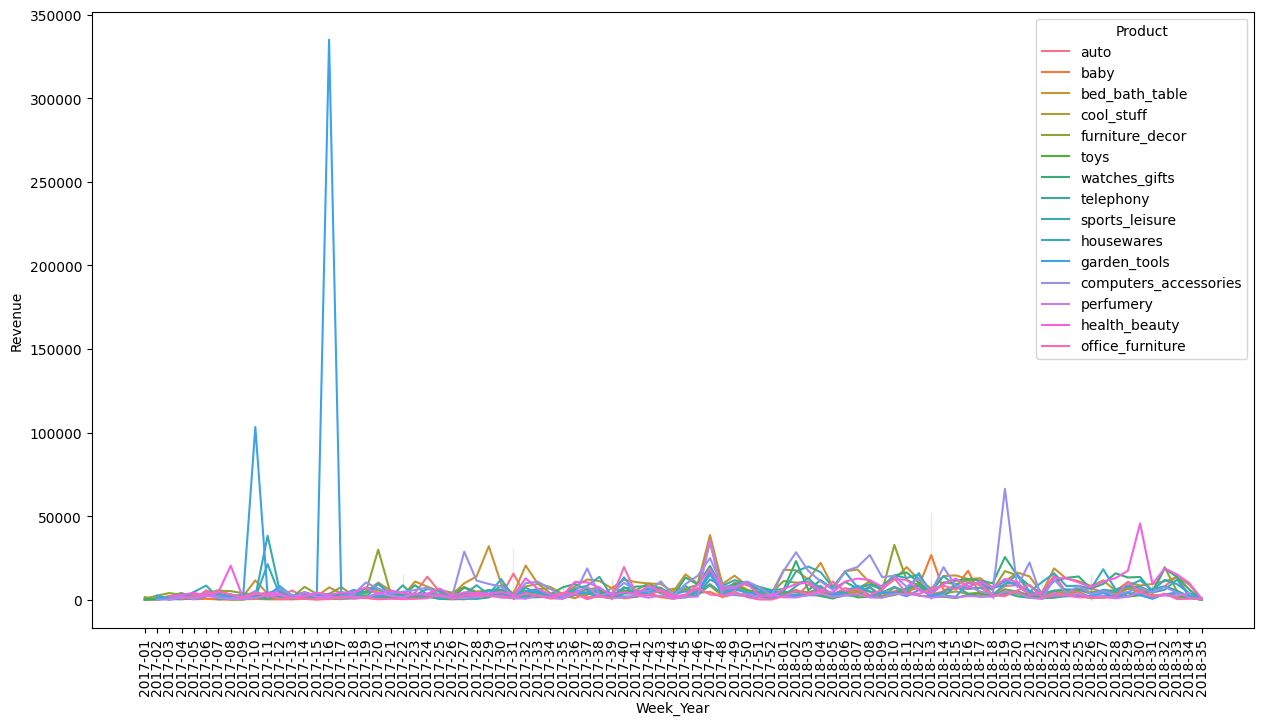

In [150]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data = Weekly_revenue_df, x='Week_Year', y='Revenue',hue='Product')
plt.xticks(rotation = 90)
sns.move_legend(ax,'upper right')
plt.show()

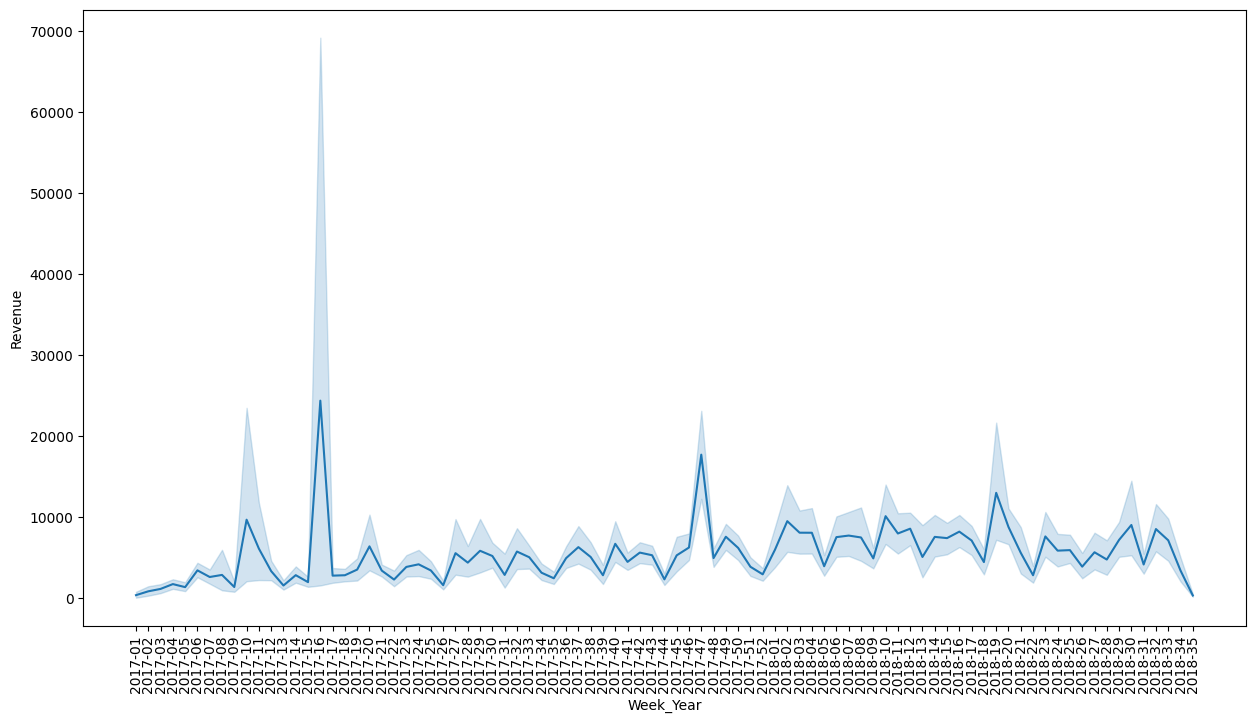

In [151]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data = Weekly_revenue_df, x='Week_Year', y='Revenue')
plt.xticks(rotation = 90)
plt.show()

### Outliar Handling

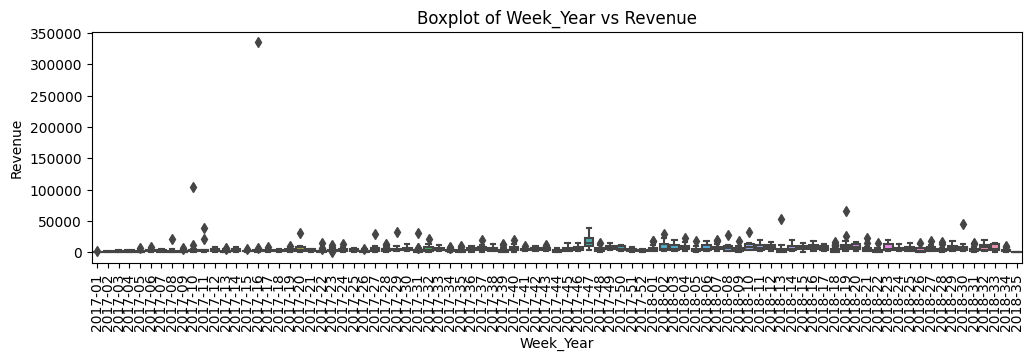

In [152]:
# Select the categorical columns
categorical_cols = [ 'Week_Year']

# Create separate box plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(12, 3))
    sns.boxplot(data=Weekly_revenue_df, x=col, y='Revenue')
    plt.title(f'Boxplot of {col} vs Revenue')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('Revenue')
    plt.show()

In [153]:
# Select the categorical columns
categorical_cols = ['Week_Year']

# Dictionary to store the count of removed outliers for each category
removed_outliers_count = {}

# Loop through each categorical column
for col in categorical_cols:
    # Get the unique values in the column
    unique_values = Weekly_revenue_df[col].unique()
    
    # Iterate through each unique value
    for value in unique_values:
        # Calculate the IQR for the current category and value
        Q1 = Weekly_revenue_df[(Weekly_revenue_df[col] == value)]['Revenue'].quantile(0.25)
        Q3 = Weekly_revenue_df[(Weekly_revenue_df[col] == value)]['Revenue'].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and count the outlier rows for the current category and value
        outliers = Weekly_revenue_df[(Weekly_revenue_df[col] == value) & ((Weekly_revenue_df['Revenue'] < lower_bound) | (Weekly_revenue_df['Revenue'] > upper_bound))]
        removed_outliers_count[(col, value)] = outliers.shape[0]

        # Remove the outlier rows for the current category and value
        Weekly_revenue_df = Weekly_revenue_df[~((Weekly_revenue_df[col] == value) & ((Weekly_revenue_df['Revenue'] < lower_bound) | (Weekly_revenue_df['Revenue'] > upper_bound)))]

# Display the number of removed outlier rows for each category and value
for (col, value), count in removed_outliers_count.items():
    print(f"Removed {count} outliers in {col} category for value {value}.")

# Display the final cleaned data frame size
print("Final cleaned data frame size:", Weekly_revenue_df.shape)
Weekly_revenue_df=Weekly_revenue_df


Removed 1 outliers in Week_Year category for value 2017-01.
Removed 0 outliers in Week_Year category for value 2017-02.
Removed 0 outliers in Week_Year category for value 2017-03.
Removed 0 outliers in Week_Year category for value 2017-04.
Removed 1 outliers in Week_Year category for value 2017-05.
Removed 1 outliers in Week_Year category for value 2017-06.
Removed 0 outliers in Week_Year category for value 2017-07.
Removed 1 outliers in Week_Year category for value 2017-08.
Removed 2 outliers in Week_Year category for value 2017-09.
Removed 2 outliers in Week_Year category for value 2017-10.
Removed 2 outliers in Week_Year category for value 2017-11.
Removed 0 outliers in Week_Year category for value 2017-12.
Removed 2 outliers in Week_Year category for value 2017-13.
Removed 0 outliers in Week_Year category for value 2017-14.
Removed 1 outliers in Week_Year category for value 2017-15.
Removed 2 outliers in Week_Year category for value 2017-16.
Removed 1 outliers in Week_Year category

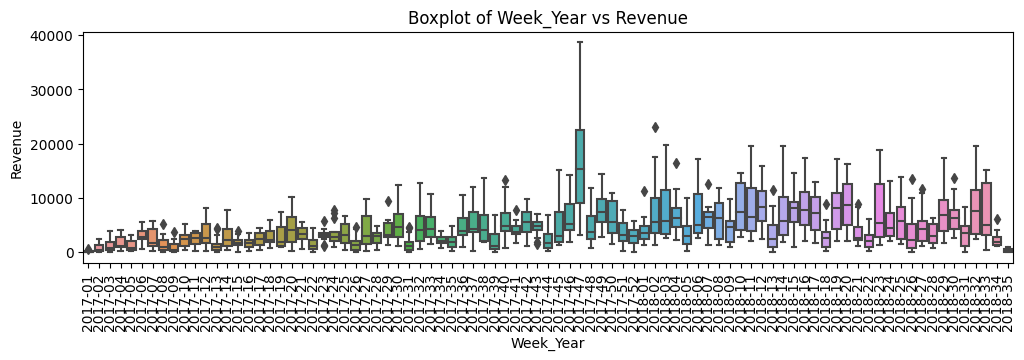

In [154]:
# Create separate box plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(12, 3))
    sns.boxplot(data=Weekly_revenue_df, x=col, y='Revenue')
    plt.title(f'Boxplot of {col} vs Revenue')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('Revenue')
    plt.show()

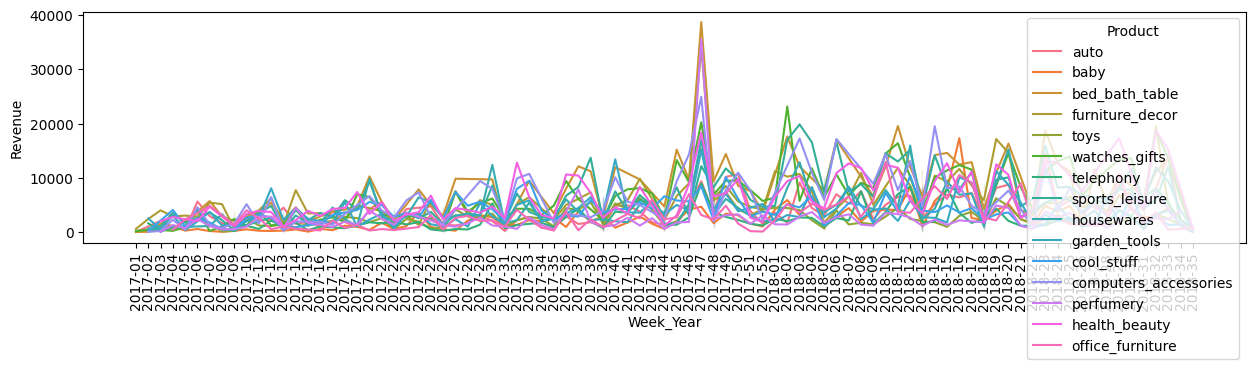

In [155]:
plt.figure(figsize=(15,3))
ax = sns.lineplot(data = Weekly_revenue_df, x='Week_Year', y='Revenue',hue='Product')
plt.xticks(rotation = 90)
sns.move_legend(ax,'upper right')
plt.show()

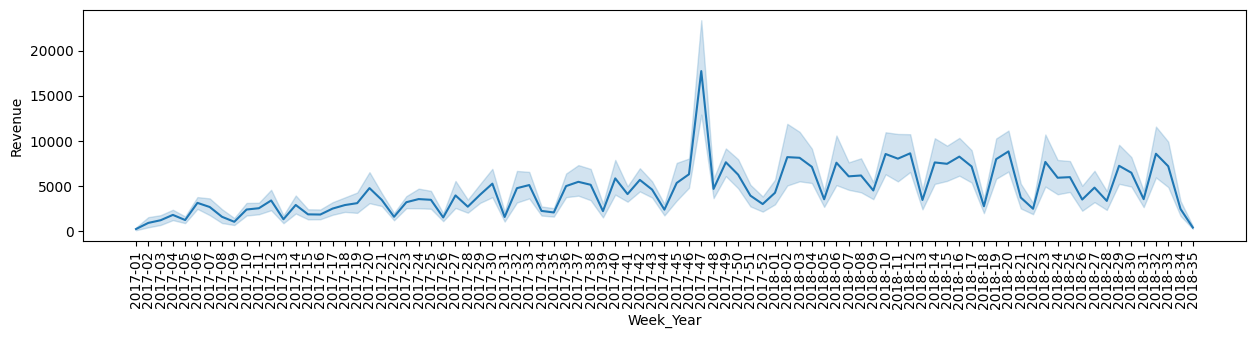

In [156]:
plt.figure(figsize=(15,3))
ax = sns.lineplot(data = Weekly_revenue_df, x='Week_Year', y='Revenue')
plt.xticks(rotation = 90)
plt.show()

# ARIMA Model (Autoregressive Integrated Moving Average)

In [157]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

## Data Formating For ARIMA

The ARIMA model only support the time of the data set and the vriable which is change with the time. Here the sales data already preprocess but they are daily records. Here, the data set has been regrouped as weekly data becasue then the next 24 weeks (6 month) revenue forcast can be easily moniter with sufficiant records.

 Check for Stationarity

In [158]:
ARIMA_revenue_df = Weekly_revenue_df.groupby('week_starting_date').agg({'Revenue':'sum'})
ARIMA_revenue_df.reset_index('week_starting_date',inplace=True)
ARIMA_revenue_df.set_index('week_starting_date',inplace=True)
ARIMA_revenue_df

,Revenue
week_starting_date,
2017-01-02,1180.54
2017-01-09,8761.27
2017-01-16,16420.83
2017-01-23,26498.71
2017-01-30,28781.08
...,...
2018-07-30,98415.86
2018-08-06,128337.29
2018-08-13,107498.47


In [159]:
ARIMA_revenue_df.describe()

,Revenue
count,87.000000
mean,71568.361609
std,40558.125115
min,1180.540000
25%,42937.815000
50%,66369.290000
75%,98920.775000
max,265975.070000


<Figure size 1200x400 with 0 Axes>

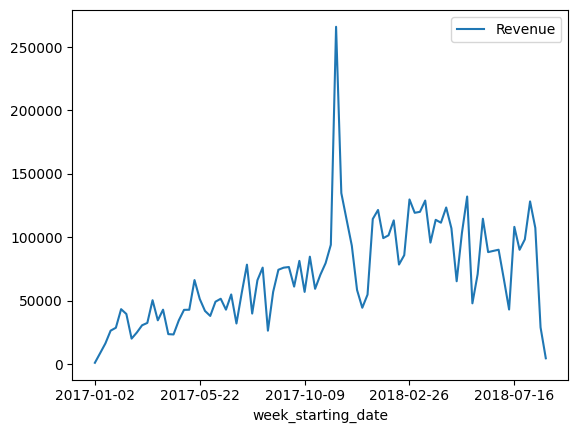

In [160]:
plt.figure(figsize=(12,4)) 
ARIMA_revenue_df.plot()
plt.show()

The above plot shows how the weekly revenue has been distributed along the time period. According to that, during 2017-10-09 and 2018-02-26, the highest revenue has been recorded.

In [161]:
result = adfuller(ARIMA_revenue_df['Revenue'])
result

(-1.7203946244394868,
 0.4206363671953145,
 6,
 80,
 {'1%': -3.5148692050781247, '5%': -2.8984085156250003, '10%': -2.58643890625},
 1747.4711594637627)

In [162]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(revenue):
    result=adfuller(revenue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [163]:
adfuller_test(ARIMA_revenue_df['Revenue'])

ADF Test Statistic : -1.7203946244394868
p-value : 0.4206363671953145
#Lags Used : 6
Number of Observations Used : 80
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [164]:
ARIMA_revenue_df['Revenue']

week_starting_date
2017-01-02      1180.54
2017-01-09      8761.27
2017-01-16     16420.83
2017-01-23     26498.71
2017-01-30     28781.08
                ...    
2018-07-30     98415.86
2018-08-06    128337.29
2018-08-13    107498.47
2018-08-20     29091.05
2018-08-27      4720.07
Name: Revenue, Length: 87, dtype: float64

The data is not stationary. 

In [165]:
ARIMA_revenue_df['Revenue First Difference'] = ARIMA_revenue_df['Revenue'] - ARIMA_revenue_df['Revenue'].shift(1)
ARIMA_revenue_df.head()

,Revenue,Revenue First Difference
week_starting_date,,
2017-01-02,1180.54,NaN
2017-01-09,8761.27,7580.73
2017-01-16,16420.83,7659.56
2017-01-23,26498.71,10077.88
2017-01-30,28781.08,2282.37


In [166]:
## Again test dickey fuller test by removing the first NA raw
adfuller_test(ARIMA_revenue_df['Revenue First Difference'].dropna())

ADF Test Statistic : -7.3467540176937405
p-value : 1.0308009823875492e-10
#Lags Used : 5
Number of Observations Used : 80
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='week_starting_date'>

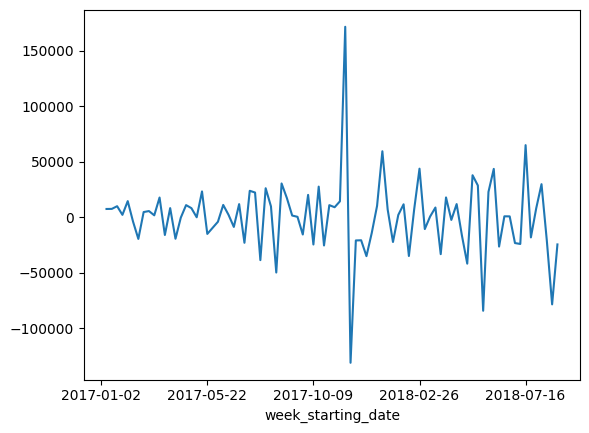

In [167]:
ARIMA_revenue_df['Revenue First Difference'].plot()

#### Auto Regressive Model

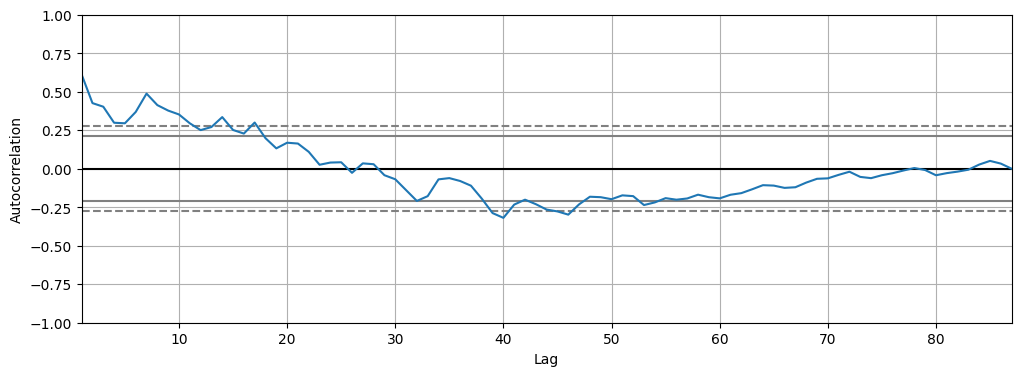

In [168]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (12,4))
autocorrelation_plot(ARIMA_revenue_df['Revenue'])
plt.show()

### Auto Correlation and Patial Autocorrelation

1. Identification of an AR model is often best done with the PACF.

- For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

2. Identification of an MA model is often best done with the ACF rather than the PACF.

- For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

- p,d,q 
    - p AR model lags 
    - d differencing 
    - q MA lags

In [169]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

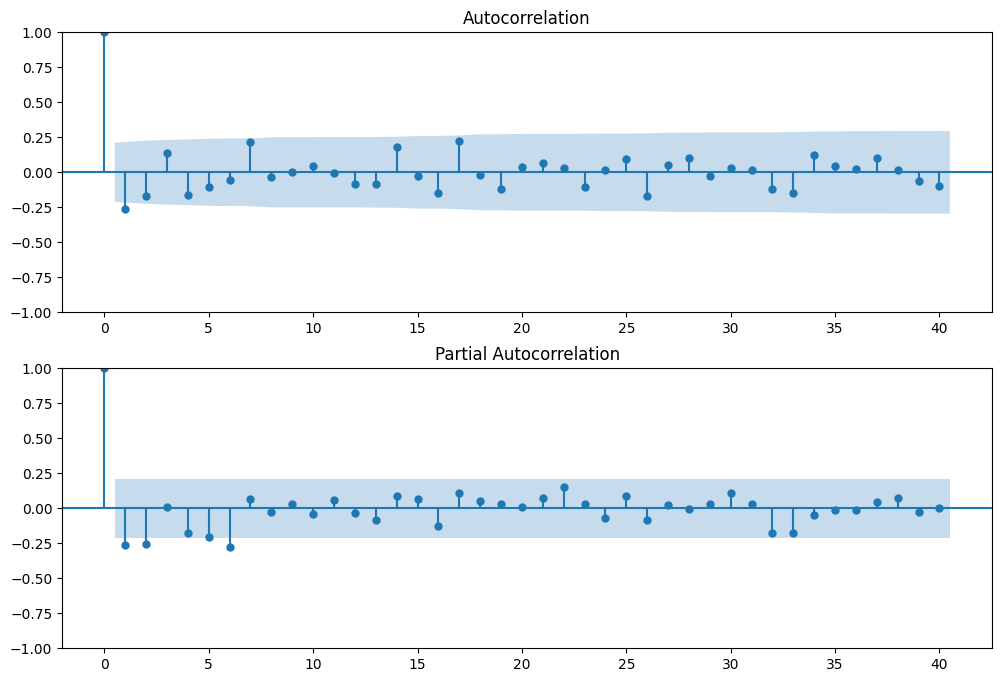

In [170]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ARIMA_revenue_df['Revenue First Difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ARIMA_revenue_df['Revenue First Difference'].iloc[1:],lags=40,ax=ax2)

In [171]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
model=ARIMA(ARIMA_revenue_df['Revenue'],order=(1,1,1))
model_fit=model.fit()

c:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [172]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   87
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1010.118
Date:                Sat, 11 Nov 2023   AIC                           2026.237
Time:                        15:50:49   BIC                           2033.600
Sample:                    01-02-2017   HQIC                          2029.200
                         - 08-27-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3409      0.186      1.837      0.066      -0.023       0.705
ma.L1         -0.8593      0.113     -7.615      0.000      -1.080      -0.638
sigma2      1.093e+09   9.45e-11   1.16e+19      0.000    1.09e+09    1.09e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               792.90
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               5.27   Skew:                             2.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.06e+34. Standard errors may be unstable.
"""

In [173]:
ARIMA_revenue_df['forecast']=model_fit.predict(start=50,end=87,dynamic=False)

<Axes: xlabel='week_starting_date'>

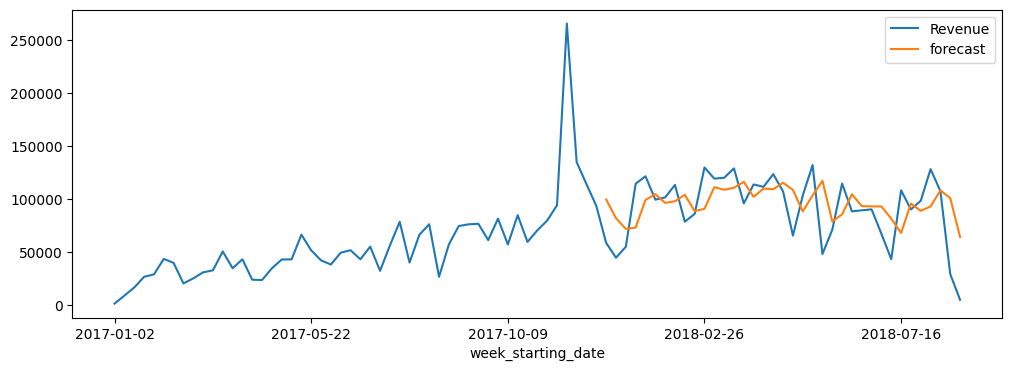

In [174]:
ARIMA_revenue_df[['Revenue','forecast']].plot(figsize=(12,4))

#### Future Forecast

In [175]:
ARIMA_revenue_df.reset_index('week_starting_date',inplace=True)
ARIMA_revenue_df['week_starting_date'] = pd.to_datetime(ARIMA_revenue_df['week_starting_date'])
ARIMA_revenue_df.set_index('week_starting_date',inplace=True)
ARIMA_revenue_df

,Revenue,Revenue First Difference,forecast
week_starting_date,,,
2017-01-02,1180.54,NaN,NaN
2017-01-09,8761.27,7580.73,NaN
2017-01-16,16420.83,7659.56,NaN
2017-01-23,26498.71,10077.88,NaN
2017-01-30,28781.08,2282.37,NaN
...,...,...,...
2018-07-30,98415.86,8165.27,88872.893728
2018-08-06,128337.29,29921.43,92999.258230
2018-08-13,107498.47,-20838.82,108171.998714


In [176]:
from pandas.tseries.offsets import DateOffset
future_dates=[ARIMA_revenue_df.index[-1]+ DateOffset(weeks=x)for x in range(0,11)]

In [177]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=ARIMA_revenue_df.columns)

In [178]:
future_df=pd.concat([ARIMA_revenue_df,future_datest_df])
future_df.tail(40)

,Revenue,Revenue First Difference,forecast
2018-02-05,113407.43,11791.78,97913.136320
2018-02-12,78599.63,-34807.80,104113.152866
2018-02-19,85994.87,7395.24,88656.570427
2018-02-26,129899.47,43904.60,90803.448392
2018-03-05,119373.40,-10526.07,111272.271945
2018-03-12,120142.05,768.65,108823.190758
2018-03-19,129027.40,8885.35,110677.591357
2018-03-26,95883.65,-33143.75,116288.406368
2018-04-02,113848.59,17964.94,102117.865198
2018-04-09,111570.37,-2278.22,109893.093941


In [179]:
future_df['forecast'] = model_fit.predict(start = 50, end = 111, dynamic= False)  
future_df.tail(25)

,Revenue,Revenue First Difference,forecast
2018-05-21,48034.13,-84169.43,117300.568230
2018-05-28,70989.45,22955.32,78859.515622
2018-06-04,114689.70,43700.25,85578.719455
2018-06-11,88393.28,-26296.42,104573.175889
2018-06-18,89361.52,968.24,93331.510575
2018-06-25,90271.51,909.99,93103.122899
2018-07-02,67128.18,-23143.33,93015.022561
2018-07-09,43163.60,-23964.58,81482.794946
2018-07-16,108287.83,65124.23,67921.587065
2018-07-23,90250.59,-18037.24,95803.705989


<Axes: >

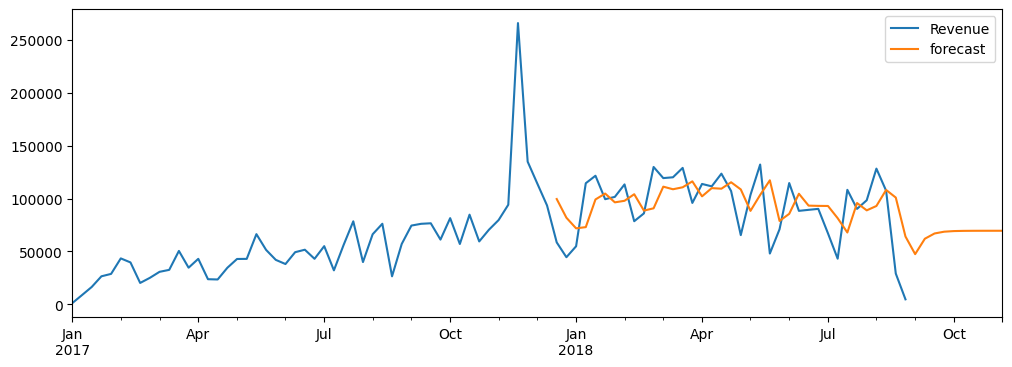

In [180]:
future_df[['Revenue', 'forecast']].plot(figsize=(12, 4)) 

## Multivariate Analysis

In [181]:
from statsmodels.tsa.api import VAR
from tabulate import tabulate
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.statespace.varmax import VARMAX

In [182]:
#Weekly Sales table
Multi_revenue_df = ecom_df.groupby(['week_starting_date']).agg({'neg':'sum','neu':'sum','pos':'sum','compound':'sum','sales_qty':'sum','review_score':'sum','price':'sum','freight_value':'sum','product_name_lenght':'mean','product_description_lenght':'mean','product_photos_qty':'mean','Revenue':'sum'})
Multi_revenue_df = Multi_revenue_df.sort_values(by=['week_starting_date'],ascending=True)
Multi_revenue_df

,neg,neu,pos,compound,sales_qty,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,Revenue
week_starting_date,,,,,,,,,,,,
2017-01-02,0.246,7.890,3.864,5.5572,14,45.0,1557.99,209.27,49.500000,980.375000,1.916667,2825.06
2017-01-09,1.503,20.269,11.228,9.6147,42,117.0,6737.65,919.04,56.707071,1036.969697,2.424242,8761.27
2017-01-16,1.917,47.324,21.761,18.9762,91,267.0,10262.77,1595.77,48.730047,720.272300,1.920188,16420.83
2017-01-23,5.470,90.457,32.072,26.0117,155,454.0,19519.05,3123.62,46.343750,1031.220052,2.355469,26498.71
2017-01-30,5.258,99.604,40.140,39.6626,169,555.0,23662.66,3928.33,48.440230,896.248276,2.270115,34807.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-30,27.265,413.955,184.785,179.4094,731,2314.0,88316.35,16026.92,49.368554,854.406699,2.234981,125538.95
2018-08-06,19.043,388.397,178.559,161.2046,678,2226.0,89964.55,16231.42,49.587140,877.150874,2.210378,128337.29
2018-08-13,15.081,345.970,158.949,161.8809,589,2097.0,81852.25,12082.31,49.784197,850.004447,2.240563,107498.47


<Axes: >

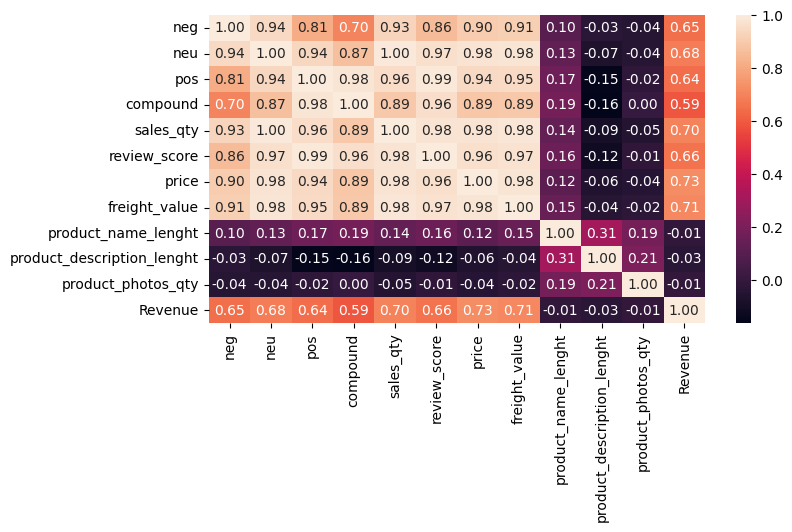

In [183]:
plt.figure(figsize=(8,4))
sns.heatmap(Multi_revenue_df.corr(),annot=True,fmt='.2f')

In [184]:
# plot all the data with time
Multi_revenue_df = Multi_revenue_df[{'neg','neu','pos','compound','sales_qty','review_score','price','freight_value','Revenue'}]
Multi_revenue_df

C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_9096\1703198298.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Multi_revenue_df = Multi_revenue_df[{'neg','neu','pos','compound','sales_qty','review_score','price','freight_value','Revenue'}]


,compound,neu,review_score,freight_value,sales_qty,price,pos,Revenue,neg
week_starting_date,,,,,,,,,
2017-01-02,5.5572,7.890,45.0,209.27,14,1557.99,3.864,2825.06,0.246
2017-01-09,9.6147,20.269,117.0,919.04,42,6737.65,11.228,8761.27,1.503
2017-01-16,18.9762,47.324,267.0,1595.77,91,10262.77,21.761,16420.83,1.917
2017-01-23,26.0117,90.457,454.0,3123.62,155,19519.05,32.072,26498.71,5.470
2017-01-30,39.6626,99.604,555.0,3928.33,169,23662.66,40.140,34807.62,5.258
...,...,...,...,...,...,...,...,...,...
2018-07-30,179.4094,413.955,2314.0,16026.92,731,88316.35,184.785,125538.95,27.265
2018-08-06,161.2046,388.397,2226.0,16231.42,678,89964.55,178.559,128337.29,19.043
2018-08-13,161.8809,345.970,2097.0,12082.31,589,81852.25,158.949,107498.47,15.081


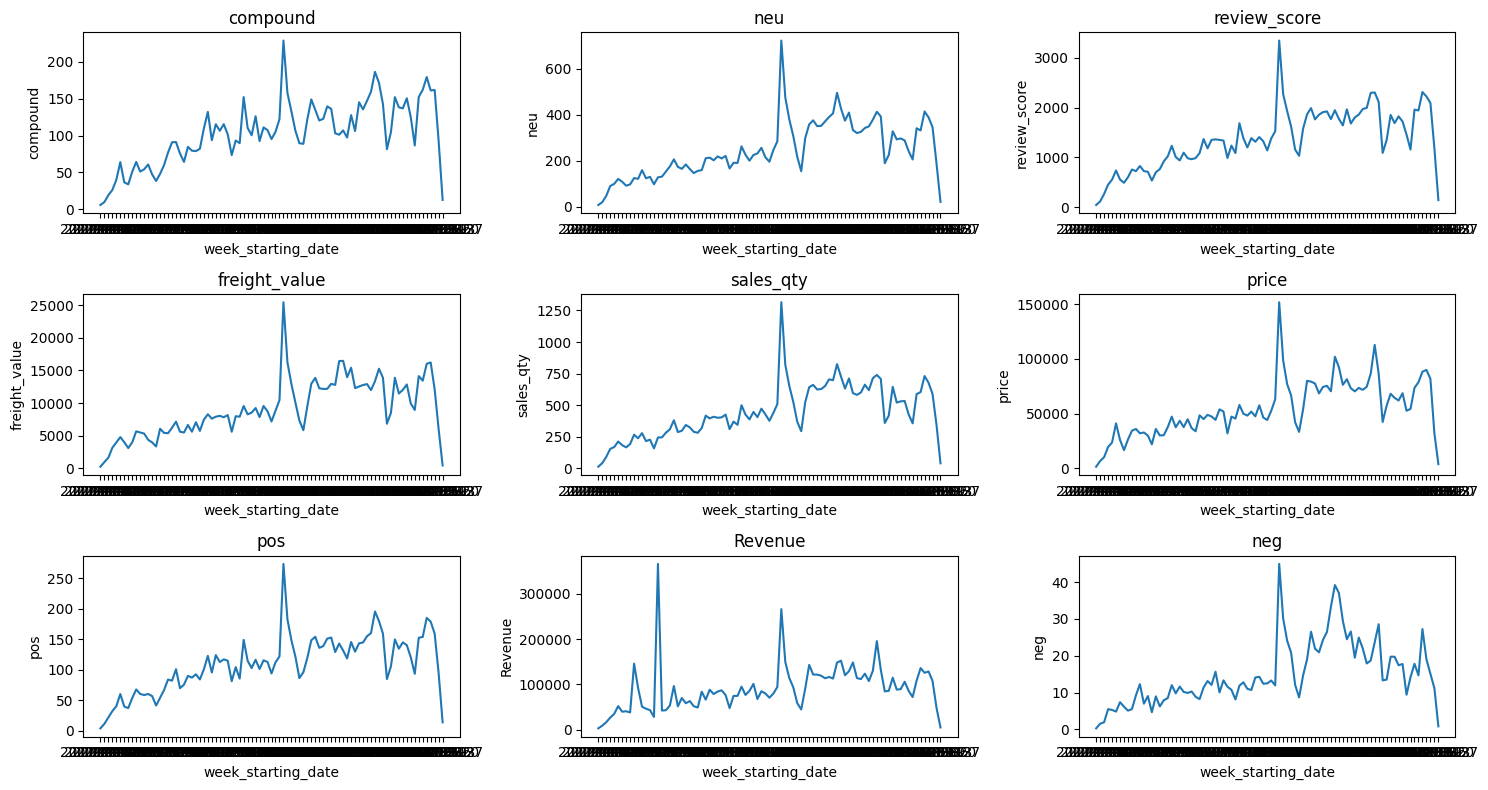

In [185]:
# Create a 1x3 subplot grid for one row with three plots
fig, axs = plt.subplots(3, 3, figsize=(15, 8))

for i, col in enumerate(Multi_revenue_df.columns):
    # Create a line plot in the i-th subplot
    sns.lineplot(data=Multi_revenue_df, x=Multi_revenue_df.index, y=col, ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(col)  # Set the title for each subplot
    
    

plt.tight_layout()  # Ensures that subplots don't overlap
plt.show()


#### Check the stationary

In [186]:
# Define an empty list to store the test results
results = []

def adfuller_test(revenue):
    result = adfuller(revenue)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    row = [i]  # Store the column name as the first element
    for value, label in zip(result, labels):
        row.append(f'{label}: {value:.5f}')
    if result[1] <= 0.05:
        row.append("Result: Reject Ho (stationary)")
    else:
        row.append("Result: Weak evidence against Ho (non-stationary)")
    results.append(row)


In [187]:
for i in Multi_revenue_df.columns:
    adfuller_test(Multi_revenue_df[i])

# Print the results in a table format
headers = ["Column Name", "ADF Test Statistic", "p-value", "#Lags Used", "Num of Observations Used", "Result"]
print(tabulate(results, headers=headers, tablefmt="pretty"))


+---------------+------------------------------+------------------+---------------------+---------------------------------------+---------------------------------------------------+
|  Column Name  |      ADF Test Statistic      |     p-value      |     #Lags Used      |       Num of Observations Used        |                      Result                       |
+---------------+------------------------------+------------------+---------------------+---------------------------------------+---------------------------------------------------+
|   compound    | ADF Test Statistic: -2.23923 | p-value: 0.19232 | #Lags Used: 9.00000 | Number of Observations Used: 77.00000 | Result: Weak evidence against Ho (non-stationary) |
|      neu      | ADF Test Statistic: -3.11705 | p-value: 0.02532 | #Lags Used: 0.00000 | Number of Observations Used: 86.00000 |          Result: Reject Ho (stationary)           |
| review_score  | ADF Test Statistic: -2.12000 | p-value: 0.23655 | #Lags Used: 9.00000 | 

In [ ]:
n=8
Multi_revenue_df['First_Diff_pos'] = Multi_revenue_df['pos'].diff()[n:]
Multi_revenue_df['First_Diff_compound'] = Multi_revenue_df['compound'].diff()[n:]
Multi_revenue_df['First_Diff_review_score'] = Multi_revenue_df['review_score'].diff()[n:]
Multi_revenue_df

In [189]:
Multi_revenue_df = Multi_revenue_df.dropna()
Multi_revenue_df.head()

,compound,neu,review_score,freight_value,sales_qty,price,pos,Revenue,neg,First_Diff_pos,First_Diff_compound,First_Diff_review_score
week_starting_date,,,,,,,,,,,,
2017-02-27,50.7619,97.448,604.0,3948.26,193,26381.35,53.485,37941.37,5.068,16.455,17.0800,112.0
2017-03-06,64.1328,124.876,759.0,5645.95,267,34481.18,67.637,145656.97,5.488,14.152,13.3709,155.0
2017-03-13,50.9656,121.544,725.0,5468.37,239,35973.20,60.214,92147.48,9.247,-7.423,-13.1672,-34.0
2017-03-20,54.1153,159.301,829.0,5302.71,279,32082.11,58.433,50500.66,12.267,-1.781,3.1497,104.0
2017-03-27,60.6415,123.855,726.0,4336.72,216,32812.23,60.176,46232.23,6.968,1.743,6.5262,-103.0


In [190]:
for i in Multi_revenue_df.columns:
    adfuller_test(Multi_revenue_df[i])

# Print the results in a table format
headers = ["Column Name", "ADF Test Statistic", "p-value", "#Lags Used", "Num of Observations Used", "Result"]
print(tabulate(results, headers=headers, tablefmt="pretty"))

+-------------------------+------------------------------+------------------+---------------------+---------------------------------------+---------------------------------------------------+
|       Column Name       |      ADF Test Statistic      |     p-value      |     #Lags Used      |       Num of Observations Used        |                      Result                       |
+-------------------------+------------------------------+------------------+---------------------+---------------------------------------+---------------------------------------------------+
|        compound         | ADF Test Statistic: -2.23923 | p-value: 0.19232 | #Lags Used: 9.00000 | Number of Observations Used: 77.00000 | Result: Weak evidence against Ho (non-stationary) |
|           neu           | ADF Test Statistic: -3.11705 | p-value: 0.02532 | #Lags Used: 0.00000 | Number of Observations Used: 86.00000 |          Result: Reject Ho (stationary)           |
|      review_score       | ADF Test Sta

Hypothesis to find the varibles with is affecting to revenue and wise versa
- H0 : Xt does not affect to Yt
- H1 : Xt affect to Yt

In [191]:
max_lags = 4
y = Multi_revenue_df.Revenue

In [192]:
Multi_revenue_df.columns

Index(['compound', 'neu', 'review_score', 'freight_value', 'sales_qty',
       'price', 'pos', 'Revenue', 'neg', 'First_Diff_pos',
       'First_Diff_compound', 'First_Diff_review_score'],
      dtype='object')

In [ ]:
# Define the maximum number of lags
max_lags = 4

# Define the columns for testing
columns_to_test = ['price', 'neu', 'sales_qty', 'neg', 'freight_value', 'First_Diff_pos', 'First_Diff_compound', 'First_Diff_review_score']

# Create an empty list to store DataFrames
results_dfs = []

# Loop through columns to perform Granger causality tests
for column in columns_to_test:
    result = grangercausalitytests(Multi_revenue_df[['Revenue', column]], max_lags,verbose=False)
    results_df = pd.DataFrame(columns=["Column", "Lag", "P-Value"])
    
    for lag in range(1, max_lags + 1):
        p_value = round(result[lag][0]['ssr_ftest'][1], 4)
        results_df = results_df.append({"Column": column, "Lag": lag, "P-Value": p_value}, ignore_index=True)
    
    results_dfs.append(results_df)

# Concatenate all DataFrames
grangercausality_df = pd.concat(results_dfs)

In [194]:
# Display the results as a nice table
grangercausality_df

,Column,Lag,P-Value
0,price,1,0.0041
1,price,2,0.0039
2,price,3,0.0093
3,price,4,0.0314
0,neu,1,0.0029
1,neu,2,0.0024
2,neu,3,0.0044
3,neu,4,0.0163
0,sales_qty,1,0.0049
1,sales_qty,2,0.0054


In [195]:
df_input = Multi_revenue_df[['Revenue','neu','neg','price','sales_qty','freight_value']]
df_input

,Revenue,neu,neg,price,sales_qty,freight_value
week_starting_date,,,,,,
2017-02-27,37941.37,97.448,5.068,26381.35,193,3948.26
2017-03-06,145656.97,124.876,5.488,34481.18,267,5645.95
2017-03-13,92147.48,121.544,9.247,35973.20,239,5468.37
2017-03-20,50500.66,159.301,12.267,32082.11,279,5302.71
2017-03-27,46232.23,123.855,6.968,32812.23,216,4336.72
...,...,...,...,...,...,...
2018-07-30,125538.95,413.955,27.265,88316.35,731,16026.92
2018-08-06,128337.29,388.397,19.043,89964.55,678,16231.42
2018-08-13,107498.47,345.970,15.081,81852.25,589,12082.31


In [196]:
df_train = df_input[:int(0.8*(len(df_input)))]
df_test = df_input[int(0.8*(len(df_input))):]

In [197]:
df_train.shape

(63, 6)

In [198]:
df_test.shape

(16, 6)

In [199]:
var_model = VAR(df_train)

c:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [200]:
sorted_order=var_model.select_order(maxlags=8)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       65.71      65.93*   3.442e+28       65.79
1       64.83       66.36   1.438e+28       65.42
2       65.21       68.05   2.202e+28       66.31
3       65.89       70.05   4.949e+28       67.50
4       66.06       71.53   7.513e+28       68.18
5       65.39       72.17   6.097e+28       68.01
6       64.37       72.47   4.996e+28       67.50
7       60.65       70.06   5.452e+27       64.29
8      55.53*       66.26  8.061e+26*      59.68*
-------------------------------------------------


In [201]:
var_max_model = VARMAX(df_train, order=(4,0),enforce_stationarity= True)
fitted_model = var_max_model.fit(disp=False)
print(fitted_model.summary())

c:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


c:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                  Statespace Model Results                                                  
Dep. Variable:     ['Revenue', 'neu', 'neg', 'price', 'sales_qty', 'freight_value']   No. Observations:                   63
Model:                                                                       VAR(4)   Log Likelihood               -2572.793
                                                                        + intercept   AIC                           5487.586
Date:                                                              Sat, 11 Nov 2023   BIC                           5854.062
Time:                                                                      15:51:40   HQIC                          5631.723
Sample:                                                                  02-27-2017                                         
                                                                       - 05-07-2018                                         


In [202]:
n_forecast = 16
predict = fitted_model.get_prediction(start=len(df_train),end=len(df_train) + n_forecast-1)#start="2018-05-07")

predictions=predict.predicted_mean

In [203]:
df_train.tail()

,Revenue,neu,neg,price,sales_qty,freight_value
week_starting_date,,,,,,
2018-04-09,111570.37,325.562,24.949,73531.41,601,12766.33
2018-04-16,123564.91,342.265,22.004,71761.34,663,12904.21
2018-04-23,107131.18,349.205,17.905,74586.62,619,11980.43
2018-04-30,129971.23,378.118,18.710,86549.38,714,13346.28
2018-05-07,195366.17,412.723,23.650,112835.72,740,15269.53


In [204]:
predictions.columns=['Revenue','neu','neg','price','sales_qty','freight_value']
predictions=predictions.rename_axis('week_starting_date')
predictions.reset_index('week_starting_date',inplace=True)
predictions

,week_starting_date,Revenue,neu,neg,price,sales_qty,freight_value
0,2018-05-14,125070.034155,236.558918,7.531830,63868.729008,474.360452,9688.790430
1,2018-05-21,30945.085661,57.188569,-2.369513,24879.589483,143.559449,2002.220583
2,2018-05-28,-11122.517448,-86.871621,-16.526822,-10180.841374,-86.991699,-3065.149034
3,2018-06-04,-60676.593474,-187.333963,-22.051795,-27055.599509,-277.083312,-6376.541002
4,2018-06-11,12689.525643,-95.294128,-16.253531,-7596.612847,-85.229820,-2697.554216
5,2018-06-18,6932.246098,-76.157354,-13.111290,-2779.202592,-80.172919,-1829.630903
6,2018-06-25,24447.661903,-43.550286,-9.577969,425.856300,-15.072802,-869.351247
7,2018-07-02,3569.002395,-39.368270,-7.212508,1142.253343,-34.071799,-976.068266
8,2018-07-09,8092.095470,-39.006731,-7.197930,-2445.177527,-30.108918,-1154.326772
9,2018-07-16,13062.221059,-15.701645,-3.932707,3321.451556,-0.233673,-350.464187


In [205]:
predictions['week_starting_date'].dtype

dtype('<M8[ns]')

In [206]:
df_test.reset_index('week_starting_date',inplace=True)
df_test

,week_starting_date,Revenue,neu,neg,price,sales_qty,freight_value
0,2018-05-14,132203.56,392.320,28.575,86440.73,708,13883.88
1,2018-05-21,84359.06,189.162,13.307,42437.22,360,6809.89
2,2018-05-28,85707.98,225.234,13.514,57290.48,418,8470.16
3,2018-06-04,114689.70,327.789,19.740,68165.27,646,13884.50
4,2018-06-11,88393.28,292.924,19.738,64444.15,521,11456.92
5,2018-06-18,89361.52,296.920,17.421,62007.57,531,12025.72
6,2018-06-25,105763.45,288.168,17.751,68649.13,534,12851.37
7,2018-07-02,85384.17,241.466,9.394,52632.77,427,9924.67
8,2018-07-09,71953.33,205.667,14.181,54353.87,357,8935.11
9,2018-07-16,108287.83,340.995,17.820,73573.71,588,14136.01


In [207]:
df_test['week_starting_date'].dtype 

dtype('O')

In [208]:
df_test['week_starting_date'] = pd.to_datetime(df_test['week_starting_date'])

C:\Users\Yomal Sandaruwan\AppData\Local\Temp\ipykernel_9096\1525011887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['week_starting_date'] = pd.to_datetime(df_test['week_starting_date'])


In [209]:
df_test['week_starting_date'].dtype 

dtype('<M8[ns]')

In [210]:
test_vs_pred = df_test.merge(predictions, on='week_starting_date')

In [212]:
test_vs_pred.set_index('week_starting_date')

,Revenue_x,neu_x,neg_x,price_x,sales_qty_x,freight_value_x,Revenue_y,neu_y,neg_y,price_y,sales_qty_y,freight_value_y
week_starting_date,,,,,,,,,,,,
2018-05-14,132203.56,392.320,28.575,86440.73,708,13883.88,125070.034155,236.558918,7.531830,63868.729008,474.360452,9688.790430
2018-05-21,84359.06,189.162,13.307,42437.22,360,6809.89,30945.085661,57.188569,-2.369513,24879.589483,143.559449,2002.220583
2018-05-28,85707.98,225.234,13.514,57290.48,418,8470.16,-11122.517448,-86.871621,-16.526822,-10180.841374,-86.991699,-3065.149034
2018-06-04,114689.70,327.789,19.740,68165.27,646,13884.50,-60676.593474,-187.333963,-22.051795,-27055.599509,-277.083312,-6376.541002
2018-06-11,88393.28,292.924,19.738,64444.15,521,11456.92,12689.525643,-95.294128,-16.253531,-7596.612847,-85.229820,-2697.554216
2018-06-18,89361.52,296.920,17.421,62007.57,531,12025.72,6932.246098,-76.157354,-13.111290,-2779.202592,-80.172919,-1829.630903
2018-06-25,105763.45,288.168,17.751,68649.13,534,12851.37,24447.661903,-43.550286,-9.577969,425.856300,-15.072802,-869.351247
2018-07-02,85384.17,241.466,9.394,52632.77,427,9924.67,3569.002395,-39.368270,-7.212508,1142.253343,-34.071799,-976.068266
2018-07-09,71953.33,205.667,14.181,54353.87,357,8935.11,8092.095470,-39.006731,-7.197930,-2445.177527,-30.108918,-1154.326772


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


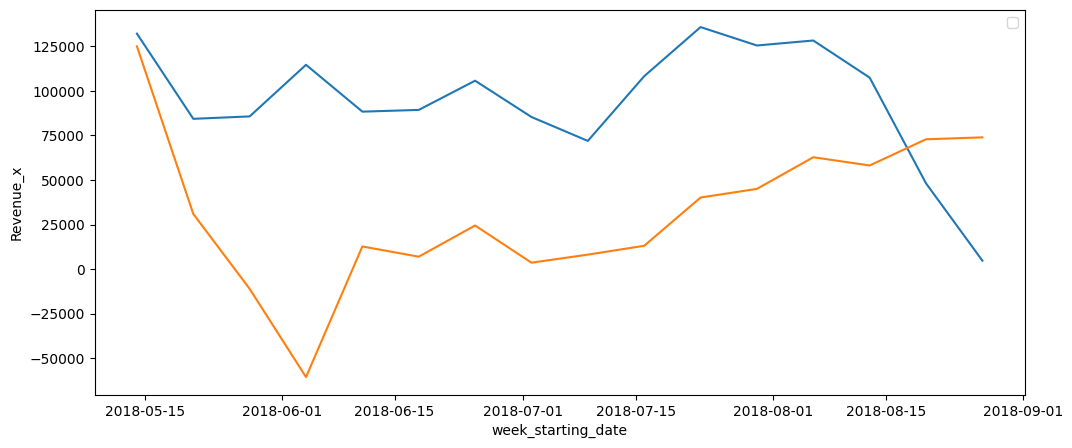

In [220]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(test_vs_pred,x='week_starting_date',y='Revenue_x')
sns.lineplot(test_vs_pred,x='week_starting_date',y='Revenue_y')
plt.legend()

In [222]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['Revenue'],df_test['Revenue']))
print('Mean value of Revenue is : {}. Root Mean Squared Error is :{}'.format(mean(df_test['Revenue']),rmse_ulc))


Mean value of Revenue is : 94762.385. Root Mean Squared Error is :82838.726906705


2nd Approach

In [ ]:
var_model = VAR(df_train)
var_result= var_model.fit(8)

c:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [ ]:
print(var_result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 10, Nov, 2023
Time:                     21:19:55
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    66.2595
Nobs:                     55.0000    HQIC:                   59.6788
Log likelihood:          -1701.31    FPE:                8.06126e+26
AIC:                      55.5294    Det(Omega_mle):     1.76352e+25
--------------------------------------------------------------------
Results for equation Revenue
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const               203608.604877    157605.052994            1.292           0.196
L1.Revenue               0.202278         0.531192            0.381           0.703
L1.neu                2430.963288      2297.60

In [ ]:
# n_forecast = 12
# predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

# predictions=predict.predicted_mean

In [ ]:
lag=var_result.k_ar
lag

8

In [ ]:
var_result.forecast(df_train.values[-lag:],steps=5)
var_result_array = var_result.forecast(df_train.values[-lag:],steps=5)
# var_result_df = pd.DataFrame(np.array(var_result))

In [ ]:
df_test.tail()

,Revenue,neu,neg,price,sales_qty,freight_value
week_starting_date,,,,,,
2018-07-30,125538.95,413.955,27.265,88316.35,731,16026.92
2018-08-06,128337.29,388.397,19.043,89964.55,678,16231.42
2018-08-13,107498.47,345.970,15.081,81852.25,589,12082.31
2018-08-20,48122.35,187.905,11.164,32111.25,344,5962.91
2018-08-27,4720.07,21.442,0.795,3877.77,41,402.52


In [ ]:
# Your time index
time_index = pd.date_range(start='2018-08-27', periods=len(var_result_array), freq='W')

# Create a DataFrame
df_forecast = pd.DataFrame(var_result_array, index=time_index, columns=['Revenue', 'neu', 'neg', 'price', 'sales_qty', 'freight_value'])
df_forecast

,Revenue,neu,neg,price,sales_qty,freight_value
2018-09-02,-23021.872579,-24.869707,-30.747141,12742.313826,-39.245460,1681.566501
2018-09-09,207382.176948,343.146546,-1.391901,86075.515570,722.935139,11294.582398
2018-09-16,-16259.817343,-96.086298,-52.659212,-1555.051593,-153.441558,-5798.060666
2018-09-23,75729.184939,123.865945,-33.688610,39383.102741,305.482251,2936.728785
2018-09-30,52132.959738,-29.569850,-38.664463,16256.391082,46.561703,-4572.864371


In [ ]:
df_test.head(5)

,Revenue,neu,neg,price,sales_qty,freight_value
week_starting_date,,,,,,
2018-05-14,132203.56,392.320,28.575,86440.73,708,13883.88
2018-05-21,84359.06,189.162,13.307,42437.22,360,6809.89
2018-05-28,85707.98,225.234,13.514,57290.48,418,8470.16
2018-06-04,114689.70,327.789,19.740,68165.27,646,13884.50
2018-06-11,88393.28,292.924,19.738,64444.15,521,11456.92


In [ ]:
df_coeff=pd.DataFrame([var_result.params['Revenue'],var_result.pvalues['Revenue']]).T

In [ ]:
df_coeff

,Revenue,Revenue
const,203608.604877,0.196395
L1.Revenue,0.202278,0.703351
L1.neu,2430.963288,0.290036
L1.neg,-11872.859734,0.004743
L1.price,-2.939251,0.277020
L1.sales_qty,-483.008960,0.609123
L1.freight_value,-5.979868,0.928964
L2.Revenue,-0.271307,0.582191
L2.neu,-697.764341,0.835804
L2.neg,1386.621571,0.887951


In [ ]:
df_coeff.columns = ['coeff','pval']

In [ ]:
df_coeff.query(('pval<0.05'))

,coeff,pval
L1.neg,-11872.859734,0.004743


In [ ]:
np.where(df_coeff['pval']<0.05,1,0)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
df_coeff['valid']=np.where(df_coeff['pval']<0.05,1,0)

In [ ]:
df_coeff

,coeff,pval,valid
const,203608.604877,0.196395,0
L1.Revenue,0.202278,0.703351,0
L1.neu,2430.963288,0.290036,0
L1.neg,-11872.859734,0.004743,1
L1.price,-2.939251,0.277020,0
L1.sales_qty,-483.008960,0.609123,0
L1.freight_value,-5.979868,0.928964,0
L2.Revenue,-0.271307,0.582191,0
L2.neu,-697.764341,0.835804,0
L2.neg,1386.621571,0.887951,0


In [ ]:
coeff_arr=df_coeff['coeff'][1:].values

In [ ]:
coeff_arr.shape

(48,)

In [ ]:
coeff_arr

array([ 2.02278051e-01,  2.43096329e+03, -1.18728597e+04, -2.93925084e+00,
       -4.83008960e+02, -5.97986818e+00, -2.71307378e-01, -6.97764341e+02,
        1.38662157e+03, -2.52295430e+00,  8.99796203e+02, -6.18473663e+00,
       -1.78410004e-01, -1.05733112e+03,  5.69627397e+03, -2.22535934e+00,
        9.20451521e+02, -1.14898695e+01, -4.50078992e-01, -5.41057487e+02,
        5.94639146e+03, -6.04820531e+00,  3.64263893e+02,  1.95835849e+01,
       -3.51290367e-01,  1.89795654e+03, -8.06559417e+03, -5.00680940e+00,
       -7.31651417e+02,  3.04932120e+01, -3.36732361e-01,  9.60840449e+02,
        8.15373919e+03, -3.22448565e+00, -1.90736991e+02, -1.02537067e+01,
        4.80252290e-02,  1.76112245e+03, -3.32468981e+03,  4.94016548e+00,
       -9.72970497e+02, -2.49263023e+01, -1.57094756e-01, -2.03903941e+03,
        2.51878198e+03,  8.86322134e-02,  7.56772229e+02,  9.01475842e+00])

In [ ]:
df_train[-lag:]

,Revenue,neu,neg,price,sales_qty,freight_value
week_starting_date,,,,,,
2018-03-19,129027.40,409.264,24.502,81472.40,712,15424.37
2018-03-26,148299.02,332.947,26.587,73230.29,596,12286.39
2018-04-02,113848.59,320.373,19.462,70370.31,582,12540.06
2018-04-09,111570.37,325.562,24.949,73531.41,601,12766.33
2018-04-16,123564.91,342.265,22.004,71761.34,663,12904.21
2018-04-23,107131.18,349.205,17.905,74586.62,619,11980.43
2018-04-30,129971.23,378.118,18.710,86549.38,714,13346.28
2018-05-07,195366.17,412.723,23.650,112835.72,740,15269.53


In [ ]:
in_arr = df_train[-lag:][::-1].stack().to_frame().T.values

In [ ]:
in_arr.shape

(1, 48)

In [ ]:
in_arr

array([[1.9536617e+05, 4.1272300e+02, 2.3650000e+01, 1.1283572e+05,
        7.4000000e+02, 1.5269530e+04, 1.2997123e+05, 3.7811800e+02,
        1.8710000e+01, 8.6549380e+04, 7.1400000e+02, 1.3346280e+04,
        1.0713118e+05, 3.4920500e+02, 1.7905000e+01, 7.4586620e+04,
        6.1900000e+02, 1.1980430e+04, 1.2356491e+05, 3.4226500e+02,
        2.2004000e+01, 7.1761340e+04, 6.6300000e+02, 1.2904210e+04,
        1.1157037e+05, 3.2556200e+02, 2.4949000e+01, 7.3531410e+04,
        6.0100000e+02, 1.2766330e+04, 1.1384859e+05, 3.2037300e+02,
        1.9462000e+01, 7.0370310e+04, 5.8200000e+02, 1.2540060e+04,
        1.4829902e+05, 3.3294700e+02, 2.6587000e+01, 7.3230290e+04,
        5.9600000e+02, 1.2286390e+04, 1.2902740e+05, 4.0926400e+02,
        2.4502000e+01, 8.1472400e+04, 7.1200000e+02, 1.5424370e+04]])